# **Stage 2: Regression – Predicting Placement Duration**

**Understanding the Objective**

This script performs regression analysis to predict how long it will take for a Pathrise participant to be placed (i.e., the duration of their job search).

The dataset has already been preprocessed in a separate script (e.g., handling missing values, encoding, and scaling).

Multiple regression models are trained and evaluated to compare performance:

Linear Regression

Ridge Regression

Lasso Regression

ElasticNet

Random Forest Regressor

XGBoost Regressor

The goal is to identify the most accurate model for predicting the placement duration in days.


این اسکریپت تحلیل رگرسیون انجام می‌دهد تا پیش‌بینی کند یک شرکت‌کننده در برنامه Pathrise چه مدت زمانی طول می‌کشد تا شاغل شود (مدت زمان جستجوی شغلی).

داده‌های مورد استفاده قبلاً در یک اسکریپت جداگانه پیش‌پردازش شده‌اند (مانند حذف مقادیر گمشده، کدگذاری و مقیاس‌بندی).

در این اسکریپت، چندین مدل رگرسیون آموزش داده و ارزیابی می‌شوند تا عملکرد آن‌ها با یکدیگر مقایسه شود:

Linear Regression

Ridge Regression

Lasso Regression

ElasticNet

Random Forest Regressor

XGBoost Regressor

هدف این است که دقیق‌ترین مدل برای پیش‌بینی مدت زمان استخدام (به روز) انتخاب شود.



# Machine Learning Prediction

## Import dataset

In [341]:
#from google.colab import files # For use in google colab

In [342]:
#uploaded = files.upload() # For use in google colab

## Import Libraries and Define Auxiliary Functions

In [344]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
# Allows us to evaluate regression models using the mean absolute error metric
from sklearn.metrics import mean_absolute_error
# Linear regression algorithm for predicting continuous outcomes
from sklearn.linear_model import LinearRegression
# Ensemble regression model that uses multiple decision trees to improve prediction accuracy
from sklearn.ensemble import RandomForestRegressor
# Regularized linear regression that combines L1 and L2 penalties to handle multicollinearity and feature selection
from sklearn.linear_model import ElasticNet
# Regularized linear regression using L1 penalty for feature selection by shrinking some coefficients to zero
from sklearn.linear_model import Lasso
# Regularized linear regression using L2 penalty to prevent overfitting by shrinking coefficients
from sklearn.linear_model import Ridge
# XGBoost regression model optimized for speed and performance on structured data
from xgboost import XGBRegressor
# Allows us to save and load Python objects, such as trained models
import pickle
# Allows us to efficiently save and load large Python objects, especially machine learning models with NumPy arrays
import joblib


## Load the dataframe

In [347]:
df = pd.read_csv('preprocessed_pathrise_df_placed.csv')

### Data Understanding

In [349]:
df.head()

,program_duration_days,placed,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,primary_track_Web & Marketing,cohort_tag_APR18A,...,work_auth_grouped_Work Visa,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,89.0,1,10,100,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,193.0,1,5,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,73.0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,83.0,1,0,15,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,76.0,1,0,30,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [350]:
df = df[df['program_duration_days'] <= 370].copy()

In [351]:
df = df.astype(int)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, 0 to 880
Data columns (total 100 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   program_duration_days                                             872 non-null    int32
 1   placed                                                            872 non-null    int32
 2   number_of_interviews                                              872 non-null    int32
 3   number_of_applications                                            872 non-null    int32
 4   primary_track_Data                                                872 non-null    int32
 5   primary_track_Design                                              872 non-null    int32
 6   primary_track_PSO                                                 872 non-null    int32
 7   primary_track_SWE                                        

https://github.com/Mahdi-Alijani-Lati

In [353]:
set(df['placed'])

{1}

In [354]:
set(df['short_participation'])
#short_participation

{0, 1}

In [355]:
filtered_df = df[(df['placed'] == 1) & (df['short_participation'] == 0)]
filtered_df

,program_duration_days,placed,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,primary_track_Web & Marketing,cohort_tag_APR18A,...,work_auth_grouped_Work Visa,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
29,10,1,0,10,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
160,9,1,0,15,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
169,9,1,0,4,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
220,11,1,5,20,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
281,10,1,0,10,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
400,6,1,0,15,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
440,13,1,1,45,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
454,12,1,2,6,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
473,1,1,1,15,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
505,8,1,0,80,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [356]:
# Create an empty list to store model names and their MAE values
mae_results = []

In [357]:
#df.columns


## Feature Engineering

In [359]:
X = df.drop(columns=["program_duration_days","placed"])

In [360]:
y = df['program_duration_days']

# Modeling

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 27)

 ## Linear Regression with feature scaling

In [364]:
# Standardize X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [365]:
# Train and Predict
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)


In [366]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print("MAE Linear Regression after scaling:", mae)


MAE Linear Regression after scaling: 7581675411164.983


In [367]:
# print the coefficients(b1, b2, ...)
print(lr.coef_)

[-1.09904293e+01 -5.74505680e+00  5.52388964e+15  5.73914487e+15
  5.29525757e+15  8.57722686e+15  1.09361104e+15 -1.77037611e+14
 -2.00408601e+14 -2.96004879e+14 -1.77037611e+14 -9.50221063e+13
 -2.73595955e+14 -2.21191085e+14 -2.65650770e+14 -2.48911529e+14
 -4.38910867e+14 -2.11073393e+14 -2.40058289e+14 -3.09925898e+14
 -2.30833630e+14 -2.65650770e+14 -9.50221063e+13 -1.49872018e+14
 -3.81336666e+14 -2.88754264e+14 -2.40058289e+14 -2.21191085e+14
 -2.48911529e+14 -2.00408601e+14 -2.40058289e+14 -2.40058289e+14
 -2.48911529e+14 -2.30833630e+14 -3.09925898e+14 -2.21191085e+14
 -1.16282092e+14 -2.21191085e+14 -1.49872018e+14 -1.34160347e+14
 -2.65650770e+14 -2.21191085e+14 -1.64040831e+14 -3.59445035e+14
 -3.23156052e+14 -2.88754264e+14 -2.11073393e+14  3.24182031e+14
 -2.21191085e+14 -2.21191085e+14 -2.48911529e+14 -2.00408601e+14
 -2.30833630e+14  2.32500000e+01  1.15541860e+14  1.76670576e+14
  1.50701636e+14  2.14756496e+14  2.07439959e+14  3.51576323e+15
  1.73592103e+15  1.02479

In [368]:
# print the intercept(b0)
print(lr.intercept_)

159.44210513509367


## Ridge Regression (Linear regression with L2 regularization)

In [370]:
# Initialize and train Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)



Ridge()

In [371]:
# Predict on test data
y_pred = ridge.predict(X_test_scaled)


In [372]:
# Calculate and print Mean Absolute Error
print("MAE Ridge Regression:", mean_absolute_error(y_test, y_pred))


MAE Ridge Regression: 80.83649790740556


## Lasso Regression (Linear regression with L1 regularization)

In [374]:
# Initialize and train Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=0.1)

In [375]:
# Predict on test data
y_pred = lasso.predict(X_test_scaled)


In [376]:
# Calculate and print Mean Absolute Error
print("MAE Lasso Regression:", mean_absolute_error(y_test, y_pred))


MAE Lasso Regression: 80.60166459128453


In [377]:
# Append tuples of (model name, MAE) to the list
mae_results.append(("Lasso Regression", mean_absolute_error(y_test, y_pred)))


## ElasticNet Regression (Combination of L1 and L2 regularization)


In [379]:
# Initialize and train ElasticNet regression model
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train_scaled, y_train)


ElasticNet(alpha=0.1)

In [380]:
# Predict on test data
y_pred = elasticnet.predict(X_test_scaled)


In [381]:
# Calculate and print Mean Absolute Error
print("MAE ElasticNet Regression:", mean_absolute_error(y_test, y_pred))


MAE ElasticNet Regression: 80.12611091872049


In [382]:
# Append tuples of (model name, MAE) to the list
mae_results.append(("ElasticNet Regression", mean_absolute_error(y_test, y_pred)))


## Random Forest Regressor (Non-linear, tree-based model, no scaling needed)

In [384]:
# Initialize and train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=27)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=27)

In [385]:
# Predict on test data
y_pred = rf.predict(X_test)


In [386]:
# Calculate and print Mean Absolute Error
print("MAE Random Forest Regression:", mean_absolute_error(y_test, y_pred))


MAE Random Forest Regression: 78.7970992366412


In [387]:
# Append tuples of (model name, MAE) to the list
mae_results.append(("Random Forest Regression", mean_absolute_error(y_test, y_pred)))


## XGBoost (eXtreme Gradient Boosting)

In [389]:

# Create and fit model
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("MAE XGBoost Regression:", mae_xgb)


MAE XGBoost Regression: 81.73604522133601


In [390]:
# Append tuples of (model name, MAE) to the list
mae_results.append(("XGBoost Regression", mean_absolute_error(y_test, y_pred)))


# Model Performance Comparison

In [392]:
# Print results with model name in one line and its MAE in the next
for model_name, mae in mae_results:
    print(f" {model_name} :{mae}\n")

 Lasso Regression :80.60166459128453

 ElasticNet Regression :80.12611091872049

 Random Forest Regression :78.7970992366412

 XGBoost Regression :78.7970992366412



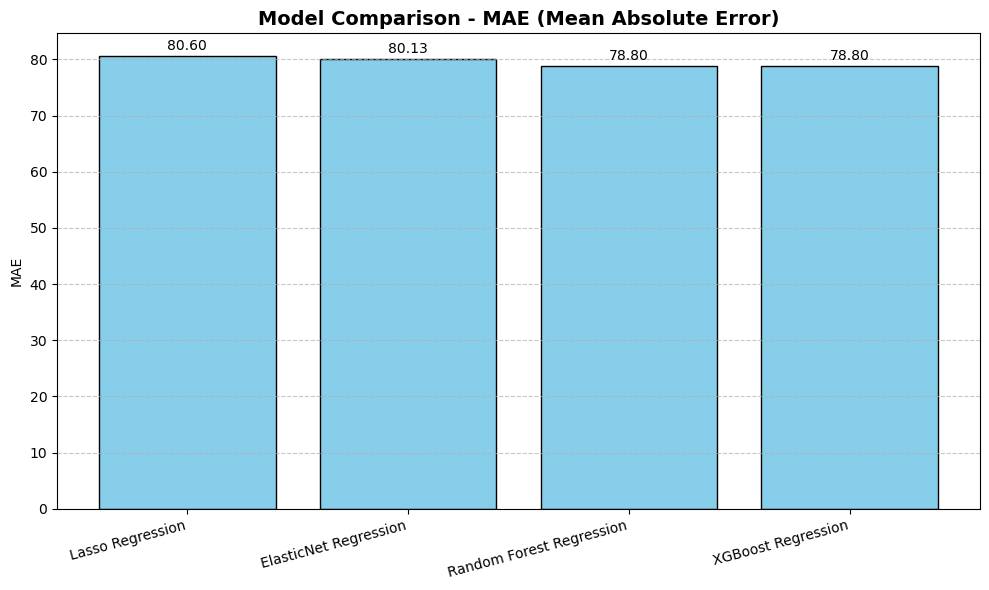

In [393]:

# mae_results is assumed to be already populated
# Example:
# mae_results = [("ElasticNet Regression", 79.74), ("Ridge Regression", 82.12), ...]

# Separate the names and MAE values
model_names = [model for model, mae in mae_results]
mae_values = [mae for model, mae in mae_results]

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mae_values, color='skyblue', edgecolor='black')

# Add the value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.5, f'{height:.2f}', ha='center', va='bottom')

# Set titles and labels
plt.title('Model Comparison - MAE (Mean Absolute Error)', fontsize=14, fontweight='bold')
plt.ylabel('MAE')
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


# Save the Model

In [395]:
pickle.dump(xgb, open('program_duration_days_Estimater_regression.pkl' , 'wb'))

In [396]:
joblib.dump(scaler, "Pathrise_scaler.pkl")

['Pathrise_scaler.pkl']

In [397]:
joblib.dump(X.columns.tolist(), "Pathrise_model_columns.pkl")

['Pathrise_model_columns.pkl']